In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [ ]:
dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
dataset.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Age vs Charges')

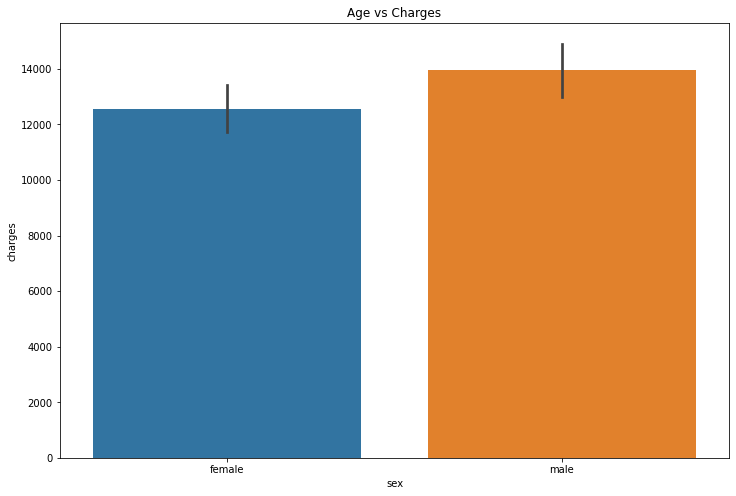

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

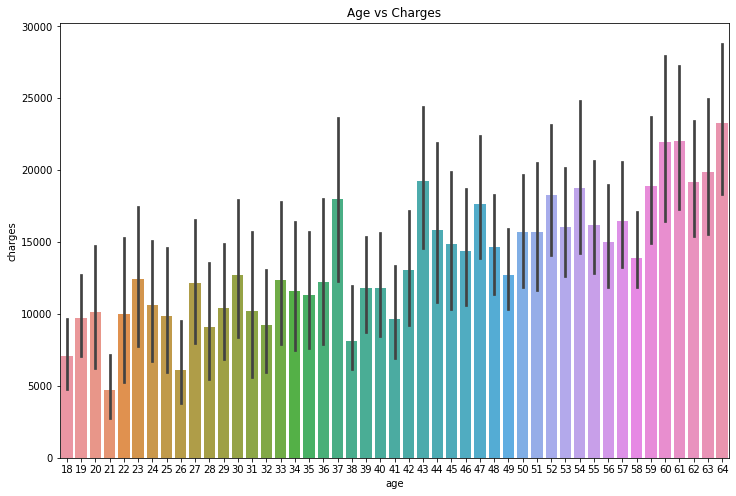

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

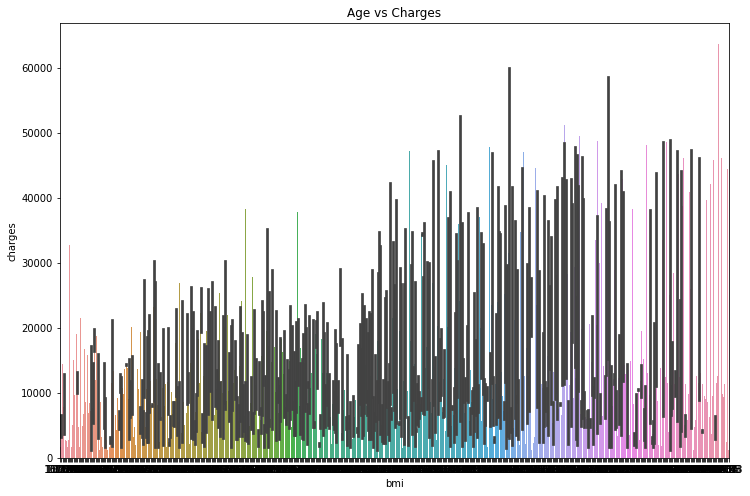

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

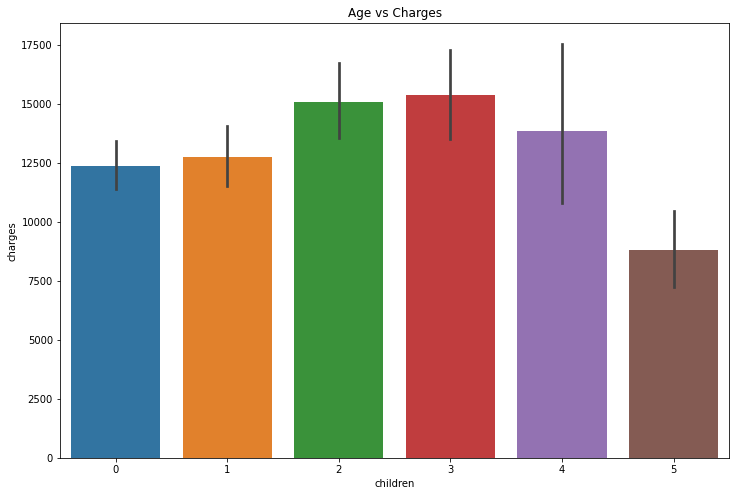

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

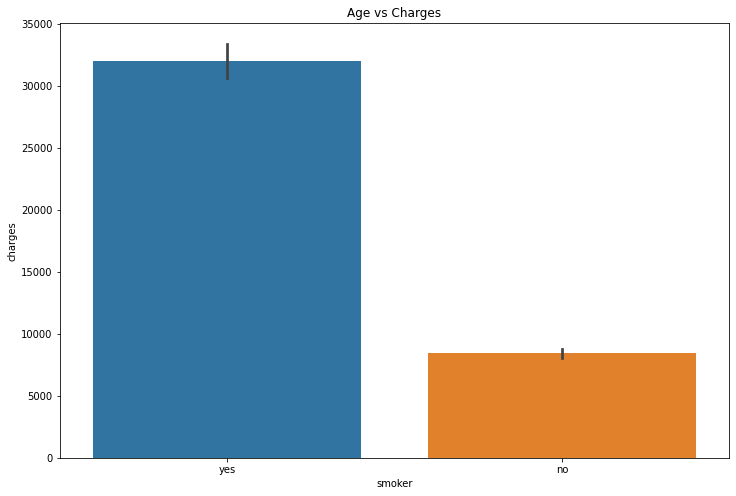

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Age vs Charges')

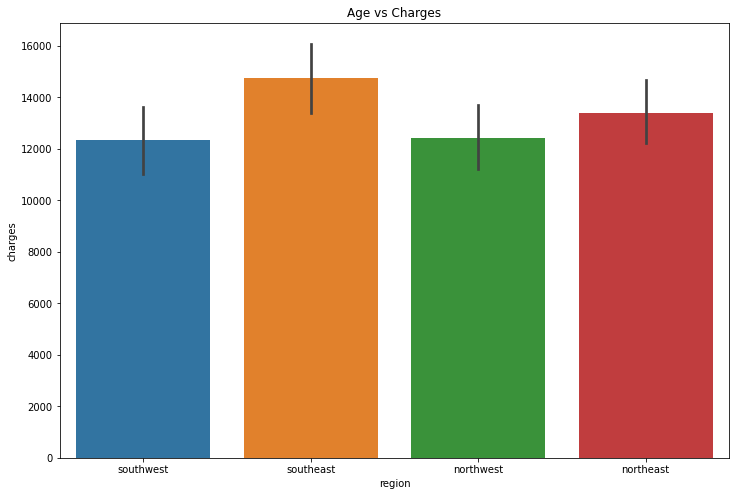

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)

plt.title("Age vs Charges")

In [ ]:
dataset = dataset.drop('region', axis = 1)

In [ ]:
dataset.head()

age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [ ]:
dataset.head()

age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520

In [ ]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,5]

print(X.shape)
print(y.shape)

(1338, 5)
(1338,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train)

0.9640086046250348

In [ ]:
# predicting the test set results
from sklearn.metrics import r2_score

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 26182729.896435566
RMSE : 5116.906281771786
r2 score : 0.8302611667814666


In [ ]:
print(y_train)

1050     8023.13545
436      2254.79670
670      4837.58230
573     31620.00106
977      2902.90650
           ...     
919      5245.22690
1164     7153.55390
500     36197.69900
941      9549.56510
421     46599.10840
Name: charges, Length: 1070, dtype: float64


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 


In [ ]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

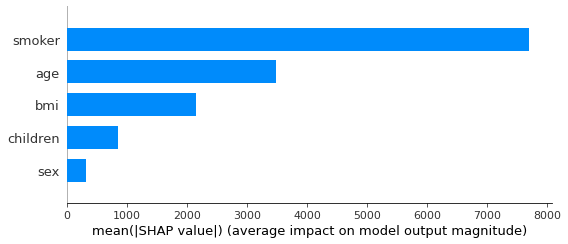

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=dataset.columns, plot_type="bar")

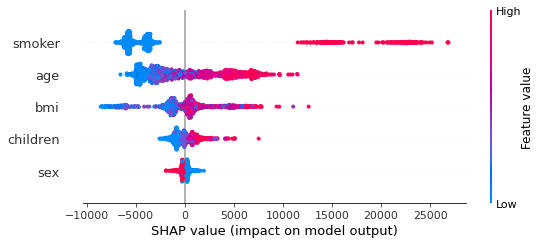

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=dataset.columns)

In [ ]:
# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0,:])

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=3f5ebe8d9bd8aa37f0fee883d31e958d104efce3e7815953d9d7870cceb4c7aa
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=dataset.columns, 
                                                   class_names=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], 
                                                   verbose=True, mode='regression')

In [ ]:
i = 25
exp = explainer.explain_instance(X_test[i], regressor.predict, num_features=5)


Intercept 5737.841180851961
Prediction_local [41561.79108136]
Right: 45736.32320999999


In [ ]:
exp.show_in_notebook(show_table=True)


In [ ]:
exp.as_list()


[('smoker > -0.51', 24181.124523072216),
 ('age > 0.86', 6861.630064592741),
 ('-0.04 < bmi <= 0.65', 2617.458141410804),
 ('children > 0.74', 2233.6269008658337),
 ('sex <= -1.01', -69.88972943196345)]

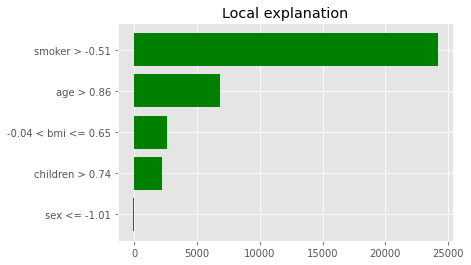

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [ ]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

In [ ]:
print("Explanation Local Prediction  : ", exp.local_pred)
print("Explanation Global Prediction : ", exp.predicted_value)

Explanation Local Prediction  :  [41561.79108136]
Explanation Global Prediction :  45736.32320999999


In [ ]:
pd.DataFrame(exp.as_list())

0             1
0       smoker > -0.51  24181.124523
1           age > 0.86   6861.630065
2  -0.04 < bmi <= 0.65   2617.458141
3      children > 0.74   2233.626901
4         sex <= -1.01    -69.889729